### Ноутбук использовался при выполнении тестового задания на должность Junior Product Analyst

__Архипова Анастасия__

Nastyarkh@mail.ru

__+7 (915) 090-93-05__


In [2]:
# Импорт необходимых библиотек
import psycopg2

import matplotlib.pyplot as plt  
import pandas as pd 
import numpy as np
import seaborn as sns
import scipy.stats as st

# магическая функция, чтобы графики отображались в блокноте под ячейками
%matplotlib inline

In [3]:
# Создание объекта для работы с БД

con = psycopg2.connect(host='rc1c-fhrb9f1e0l9g611h.mdb.yandexcloud.net', user='analytics', 
                        password='HRanalytics', dbname='hr-analytics', port=6432, sslmode='require')

In [4]:
# Быстрый доступ к таблице orders

cur = con.cursor()
cur.execute("Select * FROM orders LIMIT 0")
colnames = [desc[0] for desc in cur.description]

cur.execute("SELECT * FROM orders LIMIT 1")
rows = cur.fetchall()
for row in rows:
    for i in range(len(row)):
        name = colnames[i]
        print(name, "=", row[i])
    print('\n')
    
cur.close()

id = 3158715
user_id = 61138
total_cost = 290.0
cost = 290.0
item_total = 2543
promo_total = 0.0
total_weight = 89906
total_quantity = 35
state = shipped
shipped_at = 2018-01-05 10:50:00
created_at = 2018-01-05 00:07:04
ship_address_id = 448086
store_id = 2
delivery_window_id = 75258




Вывод пар (количество заказов, id магазина):
(26, 113)
(40, 120)
(41, 99)
(58, 100)
(126, 112)
(543, 18)
(1000, 92)
(1337, 57)
(1994, 95)
(2113, 118)
(2225, 93)
(2888, 84)
(3936, 108)
(4363, 85)
(5017, 98)
(5931, 63)
(6574, 70)
(6662, 105)
(8456, 68)
(10122, 62)
(13387, 9)
(19417, 3)
(21431, 11)
(22914, 10)
(26759, 1)
(28277, 8)
(33379, 21)
(34334, 12)
(34538, 2)
(34741, 14)


Доминируют магазины с малым (0-5000) количеством заказов, также многочисленна группа от 300000 заказов


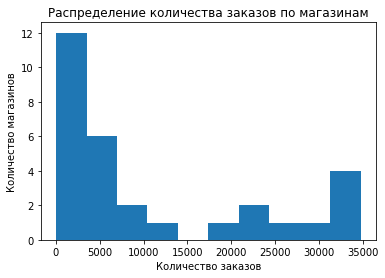

In [5]:
# Количество заказов по магазину

def sort(x):
    return x[0]

cur = con.cursor()
cur.execute("SELECT COUNT(o.Id), s.id FROM orders o INNER JOIN stores s ON o.store_id = s.id GROUP BY s.id")
result = cur.fetchall()
print('Вывод пар (количество заказов, id магазина):')

for el in sorted(result, key = sort):
    print(el)

store = []
num_of_orders = []
for el in range(len(result)):
    num_of_orders.append(int(result[el][0]))
    store.append(int(result[el][1]))
    

fig, ax = plt.subplots()    
ax.hist(num_of_orders)
plt.xlabel("Количество заказов")
plt.ylabel("Количество магазинов")
plt.title("Распределение количества заказов по магазинам")
print("\n")
print("Доминируют магазины с малым (0-5000) количеством заказов, также многочисленна группа от 300000 заказов")

In [6]:
# Общая информация о ритейлерах

cur = con.cursor()
cur.execute("SELECT s.retailer_id AS retailer, COUNT(DISTINCT(s.id)) AS num_of_stores, COUNT(o.Id) AS num_of_orders, SUM(o.item_total) AS total_value, COUNT(DISTINCT(o.user_id)) AS num_of_users FROM orders o INNER JOIN stores s ON o.store_id = s.id GROUP BY s.retailer_id LIMIT 0")
colnames = [desc[0] for desc in cur.description]
cur.execute("SELECT s.retailer_id AS retailer, COUNT(DISTINCT(s.id)) AS num_of_stores, COUNT(o.Id) AS num_of_orders, SUM(o.item_total) AS total_value, COUNT(DISTINCT(o.user_id)) AS num_of_users FROM orders o INNER JOIN stores s ON o.store_id = s.id GROUP BY s.retailer_id")
rows = cur.fetchall()

data = []

for row in rows:
    subdata = []
    for i in range(len(row)):
        subdata.append (row[i])
    data.append(subdata)
    
df1 = pd.DataFrame(data, columns = colnames)
cur.close()

In [7]:
df1.head()

,retailer,num_of_stores,num_of_orders,total_value,num_of_users
0,1,22,323427,1607456394,115844
1,8,3,1436,4692898,1035
2,15,2,7574,25768652,3879
3,16,3,192,599870,128


In [8]:
cur = con.cursor()
cur.execute("SELECT s.retailer_id AS retailer, COUNT(o.Id) AS num_of_orders, COUNT(DISTINCT(o.user_id)) AS num_of_users FROM orders o INNER JOIN stores s ON o.store_id = s.id WHERE o.state = 'canceled' GROUP BY s.retailer_id LIMIT 0")
colnames = [desc[0] for desc in cur.description]
cur.execute("SELECT s.retailer_id AS retailer, COUNT(o.Id) AS num_of_orders, COUNT(DISTINCT(o.user_id)) AS num_of_users FROM orders o INNER JOIN stores s ON o.store_id = s.id WHERE o.state = 'canceled' GROUP BY s.retailer_id")
rows = cur.fetchall()

data = []

for row in rows:
    subdata = []
    for i in range(len(row)):
        subdata.append (row[i])
    data.append(subdata)
    
df2 = pd.DataFrame(data, columns = colnames)
cur.close()

In [9]:
df2.head()

,retailer,num_of_orders,num_of_users
0,1,12,11


In [10]:
# Каким статусом обладают текущие заказы

con = psycopg2.connect(host='rc1c-fhrb9f1e0l9g611h.mdb.yandexcloud.net', user='analytics', 
                        password='HRanalytics', dbname='hr-analytics', port=6432, sslmode='require')
cur = con.cursor()
cur.execute("SELECT state, COUNT(Id) AS num_of_orders FROM orders GROUP BY state")
result = cur.fetchall()

print(result)


[('canceled', 13), ('pending', 7), ('shipped', 334225)]


(1, 26)
(8, 10)
(15, 2)
(16, 3)


Text(0.5, 1.0, 'id ритейлера и количество магазинов')

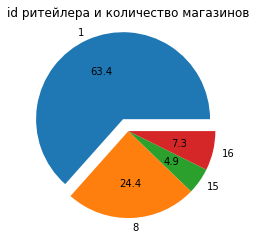

In [11]:
# Число магазинов у каждого ритейлера/принадлежность к ритейлеру

cur = con.cursor()
cur.execute("SELECT retailer_id, COUNT(id) FROM stores GROUP BY retailer_id")
result1 = cur.fetchall()
cur.close()

chart1_name = []
chart1_data = []

for el in sorted(result1, key = sort):
    chart1_name.append(el[0])
    chart1_data.append(el[1])
    print(el)

    
plt.pie(chart1_data, labels = chart1_name, autopct='%.1f', explode = [0.15] + [0 for _ in range(len(chart1_name) - 1)])
plt.title("id ритейлера и количество магазинов")

In [12]:
# Совпадает ли количество магазинов в базе и тех, из которых был совершен заказ?

con = psycopg2.connect(host='rc1c-fhrb9f1e0l9g611h.mdb.yandexcloud.net', user='analytics', 
                        password='HRanalytics', dbname='hr-analytics', port=6432, sslmode='require')
cur = con.cursor()

cur.execute("SELECT COUNT(DISTINCT(id)) FROM stores")
res1 = cur.fetchall()

cur.execute("SELECT COUNT(DISTINCT(store_id)) FROM orders")
res2 = cur.fetchall()
print('Количество магазинов в базе данных:', res1[0][0])
print('Количество магазинов, в которых совершен заказ за период:', res2[0][0])

Количество магазинов в базе данных: 41
Количество магазинов, в которых совершен заказ за период: 33


In [13]:
# Создадим фрейм с данными о каждом магазине: средний чек, общий объем заказа, среднее число позиций

con = psycopg2.connect(host='rc1c-fhrb9f1e0l9g611h.mdb.yandexcloud.net', user='analytics', 
                        password='HRanalytics', dbname='hr-analytics', port=6432, sslmode='require')

cur = con.cursor()

cur.execute("SELECT store_id, COUNT(Id) AS num_of_orders, COUNT(DISTINCT(user_id)) AS num_of_users, SUM(total_quantity) AS total_quantity, SUM(item_total) AS total_value, ROUND(AVG(total_quantity), 2) AS avg_quantity, ROUND(AVG(item_total), 2) AS avg_order_value FROM orders GROUP BY store_id LIMIT 0")
colnames = [desc[0] for desc in cur.description if desc[0]]

cur.execute("SELECT store_id, COUNT(Id) AS num_of_orders, COUNT(DISTINCT(user_id)) AS num_of_users, SUM(total_quantity) AS total_quantity, SUM(item_total) AS total_value, ROUND(AVG(total_quantity), 2) AS avg_quantity, ROUND(AVG(item_total), 2) AS avg_order_value FROM orders GROUP BY store_id")
result3 = cur.fetchall()

data = []

for row in result3:
    subdata = []
    for i in range(len(row)):
        subdata.append(row[i])
    data.append(subdata)
    
store_info = pd.DataFrame(data, columns = colnames)

In [14]:
# Соберем данные о принадлежности магазинов ритейлерам 

con = psycopg2.connect(host='rc1c-fhrb9f1e0l9g611h.mdb.yandexcloud.net', user='analytics', 
                        password='HRanalytics', dbname='hr-analytics', port=6432, sslmode='require')

cur = con.cursor()

colnames = ['store__id', 'city', 'retailer_id']

cur.execute("SELECT s1.id, s1.city, s2.retailer_id FROM stores s1 INNER JOIN stores s2 ON s1.id = s2.id")
result2 = cur.fetchall()

data = []

for row in result2:
    subdata = []
    for i in range(len(row)):
        subdata.append(row[i])
    data.append(subdata)
    
retailers = pd.DataFrame(data, columns = colnames)

In [15]:
# Фрейм с данными об отменах и заменах (что если несколько? Проверить)

con = psycopg2.connect(host='rc1c-fhrb9f1e0l9g611h.mdb.yandexcloud.net', user='analytics', 
                        password='HRanalytics', dbname='hr-analytics', port=6432, sslmode='require')


# Для замены
cur = con.cursor()
cur.execute("SELECT o.store_id, COUNT(o.ID) AS replace_case FROM replacements r INNER JOIN orders o ON r.order_id = o.Id INNER JOIN stores s ON o.store_id = s.id GROUP BY o.store_id LIMIT 0")
colnames = [desc[0] for desc in cur.description]
cur.execute("SELECT o.store_id, COUNT(o.ID) AS replace_case FROM replacements r INNER JOIN orders o ON r.order_id = o.Id INNER JOIN stores s ON o.store_id = s.id GROUP BY o.store_id")
rows = cur.fetchall()

data = []

for row in rows:
    subdata = []
    for i in range(len(row)):
        subdata.append (row[i])
    data.append(subdata)
    
rep = pd.DataFrame(data, columns = colnames)

# Считается количество замен/отмен товаров по магазинам т.к. к таблице замен/отмен присоединяется заказы

# Для отмены
cur = con.cursor()
cur.execute("SELECT o.store_id, COUNT(o.ID) AS cancel_case FROM cancellations c INNER JOIN orders o ON c.order_id = o.Id INNER JOIN stores s ON o.store_id = s.id GROUP BY o.store_id LIMIT 0")
colnames2 = [desc[0] for desc in cur.description]
cur.execute("SELECT o.store_id, COUNT(o.ID) AS cancel_case FROM cancellations c INNER JOIN orders o ON c.order_id = o.Id INNER JOIN stores s ON o.store_id = s.id GROUP BY o.store_id LIMIT 10")
rows2 = cur.fetchall()

data2 = []

for row in rows2:
    subdata = []
    for i in range(len(row)):
        subdata.append (row[i])
    data2.append(subdata)
    
can = pd.DataFrame(data2, columns = colnames2)

In [16]:
# Объединим с данными о ритейлере, заменах и отменах, избавимся от пустых строк

stores_info = pd.concat([retailers, store_info, rep['replace_case'], can['cancel_case']], axis='columns')
# stores_info = stores_info.dropna(axis=0, subset=['store_id', 'avg_order_value'])  # Не из всех магазинов были заказы

del stores_info['store_id']

stores_info.info()

# Cнимаем копию для работы с магазинами, в которых были заказы
viz = stores_info.copy()
viz['replace_case'].fillna(0, inplace=True)
viz['cancel_case'].fillna(0, inplace=True)
viz.dropna(0, inplace=True)
viz = viz.apply(pd.to_numeric, errors='raise')    # Меняем тип на числовой


stores_info.fillna(0, inplace=True)    # Заполнили пустые строки для магазинов без заказов
stores_info = stores_info.apply(pd.to_numeric, errors='raise')    # Меняем тип на числовой


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   store__id        41 non-null     int64  
 1   city             41 non-null     int64  
 2   retailer_id      41 non-null     int64  
 3   num_of_orders    33 non-null     float64
 4   num_of_users     33 non-null     float64
 5   total_quantity   33 non-null     object 
 6   total_value      33 non-null     object 
 7   avg_quantity     33 non-null     object 
 8   avg_order_value  33 non-null     object 
 9   replace_case     30 non-null     float64
 10  cancel_case      10 non-null     float64
dtypes: float64(4), int64(3), object(4)
memory usage: 3.6+ KB


In [17]:
stores_info.head()

,store__id,city,retailer_id,num_of_orders,num_of_users,total_quantity,total_value,avg_quantity,avg_order_value,replace_case,cancel_case
0,1,1,1,26759.0,9869.0,1305960.0,143087000.0,48.80,5347.25,26957.0,39569.0
1,2,1,1,34538.0,12480.0,1654792.0,178414982.0,47.91,5165.76,29639.0,46349.0
2,3,1,1,19417.0,8416.0,767815.0,84606224.0,39.54,4357.33,16129.0,34882.0
3,8,1,1,541.0,358.0,16384.0,1879542.0,30.28,3474.20,27500.0,45309.0
4,9,1,1,28277.0,10777.0,1223404.0,135796389.0,43.26,4802.36,11071.0,21434.0


Text(0.5, 1.0, 'Распределение и объем заказов в зависимости от востребованности магазина')

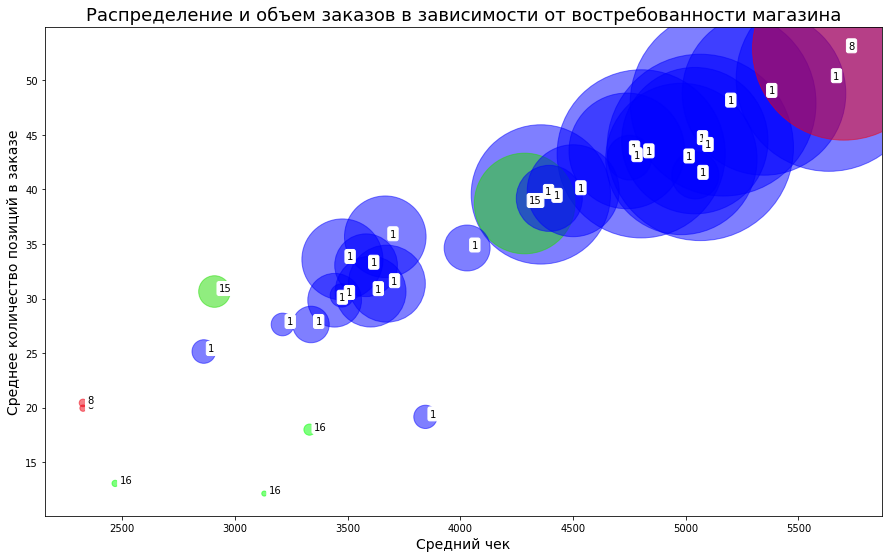

In [18]:
# Построим диаграмму, отображающую величину ср. чека и количество заказов по магазинам
# Цветом будет обозначается ритейлер, размером - количество заказов

fig, ax = plt.subplots(figsize = (15,9))
plot = ax.scatter(viz['avg_order_value'], viz['avg_quantity'], s = viz['num_of_orders'], 
           c = viz['retailer_id'], cmap = 'brg', alpha = 0.5)

ax.set_ylabel('Среднее количество позиций в заказе', fontsize = 14)
ax.set_xlabel('Средний чек', fontsize = 14)

# Создаем подпись данных
for i, data in enumerate(viz['retailer_id']): 
    ax.annotate(data, (viz['avg_order_value'][i] + 20, viz['avg_quantity'][i]), fontsize = 10, bbox=dict(boxstyle='round,pad=0.2', color='white'))

plt.title('Распределение и объем заказов в зависимости от востребованности магазина', fontsize=18)
    
#plt.savefig('stores.png')  # сохраняем

Text(0.5, 1.0, 'Correlogram')

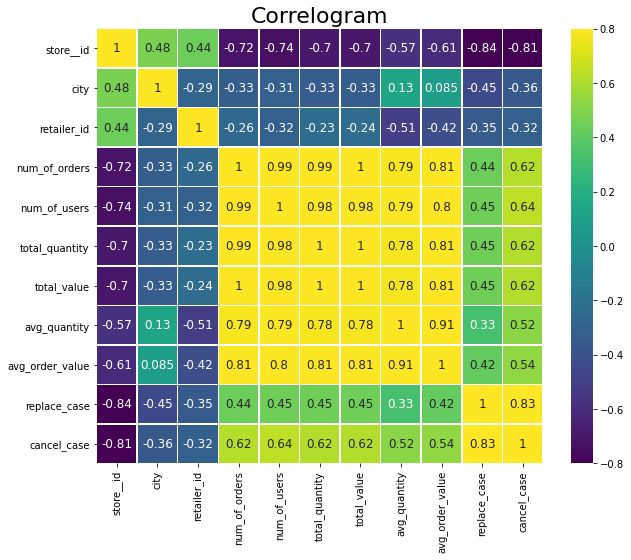

In [19]:
# Посмотрим как коррелируют между собой переменные 

fig , ax = plt.subplots(figsize = (10,8))
sns.heatmap(viz.corr(),  vmax=0.8, vmin = -0.8, linewidths=0.5, annot=True,cmap='viridis',
            linecolor="white", xticklabels=viz.corr().columns, yticklabels=viz.corr().columns, annot_kws = {'size':12})
plt.title('Correlogram', fontsize=22)

Text(0.5, 1.0, 'Correlogram')

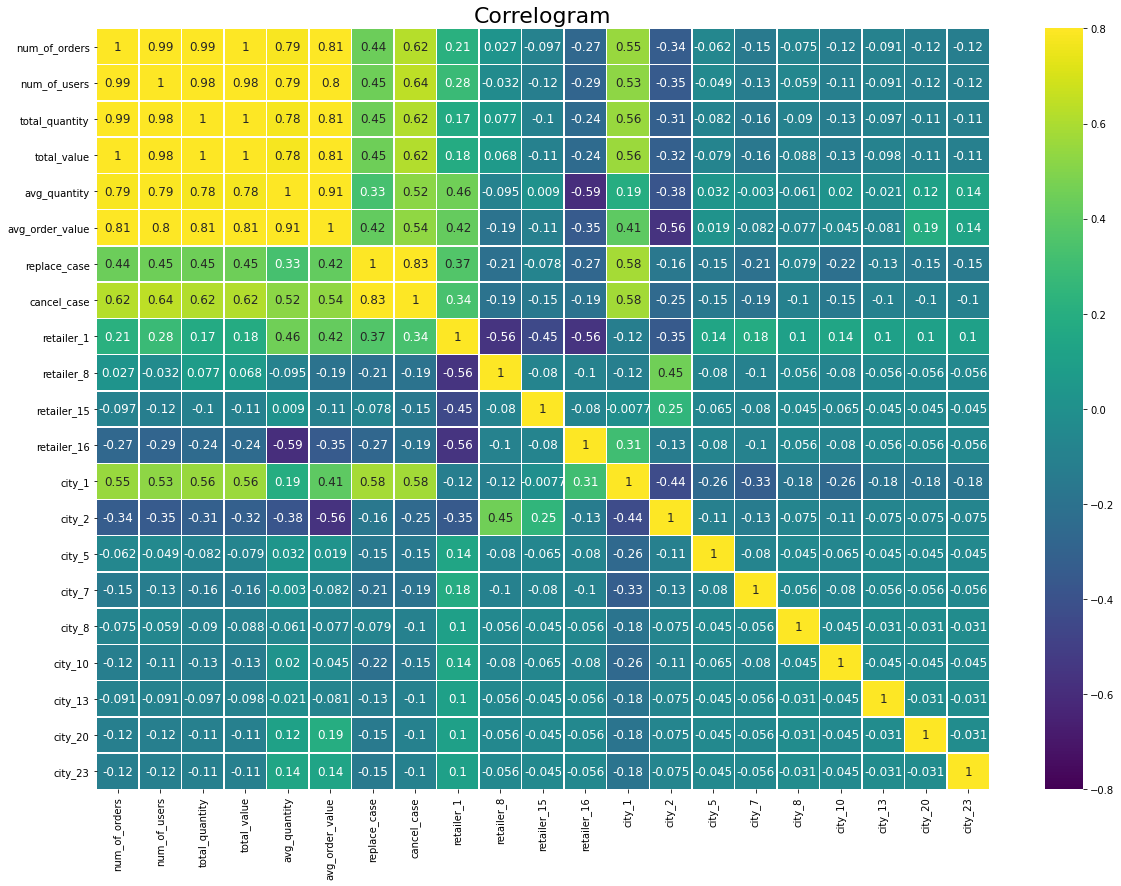

In [20]:
# Без one-hot кодирования бесполезно смотреть корреляцию между категориальными переменными

retailer_id = pd.get_dummies(viz.retailer_id , prefix='retailer')
city = pd.get_dummies(viz.city, prefix='city')

viz2 = pd.concat([viz, retailer_id, city], axis=1)
del viz2['city']
del viz2['retailer_id']
del viz2['store__id']

# Сформируем фрейм для работы с корреляцией переменных. Для этого необходимо кодировать категориальные

# Plot
fig , ax = plt.subplots(figsize = (20,14))
sns.heatmap(viz2.corr(),  vmax=0.8, vmin = -0.8, linewidths=0.5, annot=True,cmap='viridis',
            linecolor="white", xticklabels=viz2.corr().columns, yticklabels=viz2.corr().columns, annot_kws = {'size':12})
plt.title('Correlogram', fontsize=22)

In [21]:
viz.head()

,store__id,city,retailer_id,num_of_orders,num_of_users,total_quantity,total_value,avg_quantity,avg_order_value,replace_case,cancel_case
0,1,1,1,26759.0,9869.0,1305960.0,143087000.0,48.80,5347.25,26957.0,39569.0
1,2,1,1,34538.0,12480.0,1654792.0,178414982.0,47.91,5165.76,29639.0,46349.0
2,3,1,1,19417.0,8416.0,767815.0,84606224.0,39.54,4357.33,16129.0,34882.0
3,8,1,1,541.0,358.0,16384.0,1879542.0,30.28,3474.20,27500.0,45309.0
4,9,1,1,28277.0,10777.0,1223404.0,135796389.0,43.26,4802.36,11071.0,21434.0


Text(0.5, 1.0, 'Сравнение количества заказанных и замененных позиций по магазинам')

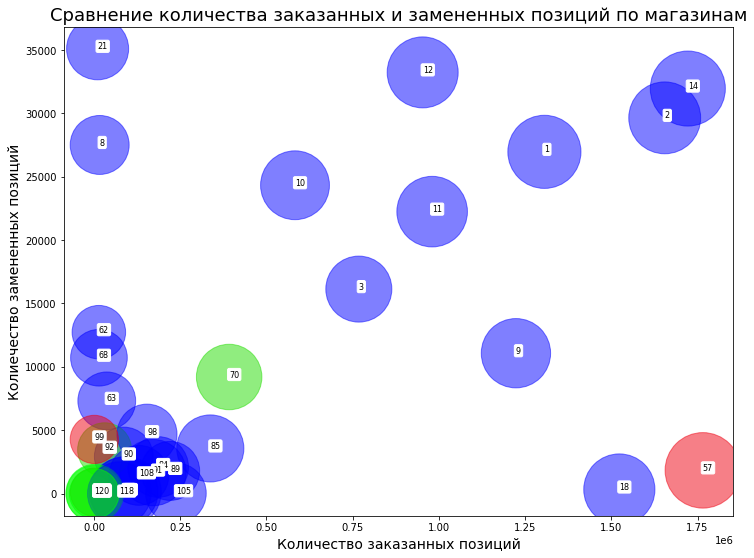

In [22]:
# Построим диаграмму, отображающую количество замен товаров
# Цветом будет обозначается ритейлер, размером - количество заказов, подпись - id магазина

fig, ax = plt.subplots(figsize = (12,9))
plot = ax.scatter(viz['total_quantity'], viz['replace_case'], s = viz['avg_order_value'], 
           c = viz['retailer_id'], cmap = 'brg', alpha = 0.5)

ax.set_ylabel('Колиечество замененных позиций', fontsize = 14)
ax.set_xlabel('Количество заказанных позиций', fontsize = 14)

# Создаем подпись данных
for i, data in enumerate(viz['store__id']): 
    ax.annotate(data, (viz['total_quantity'][i] + 20, viz['replace_case'][i]), fontsize = 8, bbox=dict(boxstyle='round,pad=0.2', color='white'))

plt.title('Сравнение количества заказанных и замененных позиций по магазинам', fontsize=18)
    
#plt.savefig('stores3.png')  # сохраняем

Text(0.5, 1.0, 'Сравнение количества заказанных и отмененных позиций по магазинам')

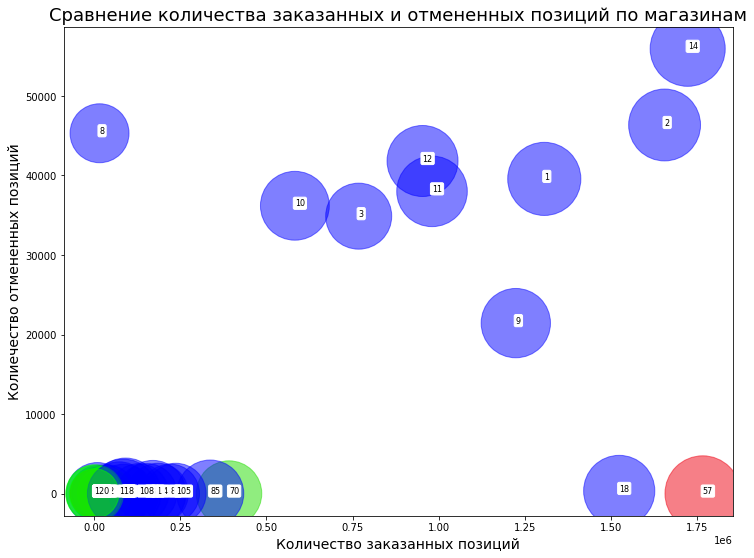

In [23]:
# Построим диаграмму, отображающую количество отмен товаров
# Цветом будет обозначается ритейлер, размером - количество заказов, подпись - id магазина

fig, ax = plt.subplots(figsize = (12,9))
plot = ax.scatter(viz['total_quantity'], viz['cancel_case'], s = viz['avg_order_value'], 
           c = viz['retailer_id'], cmap = 'brg', alpha = 0.5)

ax.set_ylabel('Колиечество отмененных позиций', fontsize = 14)
ax.set_xlabel('Количество заказанных позиций', fontsize = 14)

# Создаем подпись данных
for i, data in enumerate(viz['store__id']): 
    ax.annotate(data, (viz['total_quantity'][i] + 20, viz['cancel_case'][i]), fontsize = 8, bbox=dict(boxstyle='round,pad=0.2', color='white'))

plt.title('Сравнение количества заказанных и отмененных позиций по магазинам', fontsize=18)
    
#plt.savefig('stores4.png')  # сохраняем

# Работа с DataFrame

In [57]:
# Для удобства дальнейшей работы создаем DataFrame с orders

con = psycopg2.connect(host='rc1c-fhrb9f1e0l9g611h.mdb.yandexcloud.net', user='analytics', 
                        password='HRanalytics', dbname='hr-analytics', port=6432, sslmode='require')

cur = con.cursor()
cur.execute("Select * FROM orders LIMIT 0")
colnames = [desc[0] for desc in cur.description if desc[0]]

cur.execute("SELECT * FROM orders")
rows = cur.fetchall()

data = []

for row in rows:
    subdata = []
    for i in range(len(row)):
        subdata.append(row[i])
    data.append(subdata)
    
orders = pd.DataFrame(data, columns = colnames)

orders.head()

,id,user_id,total_cost,cost,item_total,promo_total,total_weight,total_quantity,state,shipped_at,created_at,ship_address_id,store_id,delivery_window_id
0,3158715,61138,290.0,290.0,2543,0.0,89906,35,shipped,2018-01-05 10:50:00,2018-01-05 00:07:04,448086,2,75258.0
1,3182881,73307,190.0,190.0,6076,0.0,30275,52,shipped,2018-01-06 15:33:54,2018-01-05 02:04:42,450946,10,75860.0
2,3146329,75386,290.0,290.0,2617,0.0,93040,24,shipped,2018-01-11 06:40:38,2018-01-05 02:07:35,458911,14,78635.0
3,3150465,45970,290.0,290.0,3422,0.0,10518,23,shipped,2018-01-06 12:55:22,2018-01-05 02:15:15,448101,21,75403.0
4,3169087,49089,90.0,90.0,3666,0.0,22740,31,shipped,2018-01-06 16:17:27,2018-01-05 02:48:52,451302,3,75825.0


In [25]:
# Знакомимся с данными
# Из 12 признаков 8 категориальные и их потребуется перекодировать.

orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334245 entries, 0 to 334244
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  334245 non-null  int64         
 1   user_id             334245 non-null  int64         
 2   item_total          334245 non-null  int64         
 3   promo_total         334245 non-null  float64       
 4   total_weight        334245 non-null  int64         
 5   total_quantity      334245 non-null  int64         
 6   state               334245 non-null  object        
 7   shipped_at          334245 non-null  datetime64[ns]
 8   created_at          334245 non-null  datetime64[ns]
 9   ship_address_id     334245 non-null  int64         
 10  store_id            334245 non-null  int64         
 11  delivery_window_id  334244 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(7), object(1)
memory usage: 30.6+ MB


In [26]:
# Категориальная переменная state принимает следующие значения:
# В дальнейшем может быть важно предсказывать отмены 

pd.unique(orders['state'])

array(['shipped', 'pending', 'canceled'], dtype=object)

# -----------------------------------------------------------------

In [27]:
orders.describe()  # Получаем информацию о распределнии переменных. Среди них много категориальных.

,id,user_id,item_total,promo_total,total_weight,total_quantity,ship_address_id,store_id,delivery_window_id
count,3.342450e+05,334245.000000,334245.000000,334245.000000,3.342450e+05,334245.000000,3.342450e+05,334245.000000,334244.000000
mean,4.188269e+06,177843.373415,4917.515152,-66.523240,2.692579e+04,44.192721,1.388983e+06,23.189529,370981.101713
std,6.588292e+05,130990.121425,5526.465519,304.918133,4.187307e+04,75.054887,6.108061e+05,29.692184,165423.948184
min,5.570000e+02,31.000000,0.000000,-39899.300000,0.000000e+00,0.000000,6.017000e+03,1.000000,75244.000000
25%,3.634639e+06,84872.000000,2566.000000,0.000000,9.685000e+03,18.000000,8.531730e+05,8.000000,231656.000000
50%,4.134595e+06,146590.000000,3873.000000,0.000000,1.818000e+04,31.000000,1.333773e+06,11.000000,372995.000000
75%,4.745424e+06,243751.000000,5806.000000,0.000000,3.193500e+04,50.000000,1.890743e+06,21.000000,517636.000000
max,5.513202e+06,682383.000000,480746.000000,0.000000,3.864000e+06,7728.000000,2.669705e+06,120.000000,638550.000000


В качестве целевой переменной могут рассматриваться статус заказа цена, варьирующаяся от 0 до 480 тыс. При этом медиана составляет 3873, значит, наблюдается сильная ассиметрия со смещением вправо и распределение может быть близко к логнормальному.

In [30]:
# Фрейм с данными об отменах и заменах (что если несколько? Проверить)

con = psycopg2.connect(host='rc1c-fhrb9f1e0l9g611h.mdb.yandexcloud.net', user='analytics', 
                        password='HRanalytics', dbname='hr-analytics', port=6432, sslmode='require')


# Для замены
cur = con.cursor()
cur.execute("SELECT * FROM replacements r INNER JOIN orders o ON r.order_id = o.Id INNER JOIN stores s ON o.store_id = s.id LIMIT 0")
colnames = [desc[0] for desc in cur.description]
cur.execute("SELECT * FROM replacements r INNER JOIN orders o ON r.order_id = o.Id INNER JOIN stores s ON o.store_id = s.id")
rows = cur.fetchall()

# Для отмены
# cur = con.cursor()
# cur.execute("SELECT * FROM cancellations c INNER JOIN orders o ON c.order_id = o.Id INNER JOIN stores s ON o.store_id = s.id LIMIT 0")
# colnames = [desc[0] for desc in cur.description]
# cur.execute("SELECT * FROM cancellations c INNER JOIN orders o ON c.order_id = o.Id INNER JOIN stores s ON o.store_id = s.id LIMIT 10")
# rows = cur.fetchall()

data = []

for row in rows:
    subdata = []
    for i in range(len(row)):
        subdata.append (row[i])
    data.append(subdata)
    
df2 = pd.DataFrame(data, columns = colnames)

del df2['id']    # Повторяется
del df2['state'] # Есть только одно значение

df2.head()

,order_id,item_id,user_id,total_cost,cost,item_total,promo_total,total_weight,total_quantity,shipped_at,created_at,ship_address_id,store_id,delivery_window_id,city,retailer_id
0,3191869,5340172,80279,0.0,0.0,1984,0.0,24591,41,2018-01-06 12:07:16,2018-01-05 11:10:40,449480,11,75869.0,1,1
1,3191869,5340149,80279,0.0,0.0,1984,0.0,24591,41,2018-01-06 12:07:16,2018-01-05 11:10:40,449480,11,75869.0,1,1
2,3178452,5774315,82588,0.0,0.0,7974,0.0,15569,40,2018-02-07 08:50:45,2018-01-05 17:51:14,505443,1,93864.0,1,1
3,3178452,5738834,82588,0.0,0.0,7974,0.0,15569,40,2018-02-07 08:50:45,2018-01-05 17:51:14,505443,1,93864.0,1,1
4,3194718,5356937,10468,290.0,290.0,2185,0.0,4044,10,2018-01-07 10:39:06,2018-01-06 13:05:26,451697,12,76424.0,1,1


# Работа с данными по заказам и клиентам

In [32]:
# Каким статусом обладают текущие заказы

con = psycopg2.connect(host='rc1c-fhrb9f1e0l9g611h.mdb.yandexcloud.net', user='analytics', 
                        password='HRanalytics', dbname='hr-analytics', port=6432, sslmode='require')
cur = con.cursor()
cur.execute("SELECT state, COUNT(Id) AS num_of_orders FROM orders GROUP BY state")
result = cur.fetchall()

print(result)

[('canceled', 13), ('pending', 7), ('shipped', 334225)]


In [33]:
orders.head()


,id,user_id,item_total,promo_total,total_weight,total_quantity,state,shipped_at,created_at,ship_address_id,store_id,delivery_window_id
0,3158715,61138,2543,0.0,89906,35,shipped,2018-01-05 10:50:00,2018-01-05 00:07:04,448086,2,75258.0
1,3182881,73307,6076,0.0,30275,52,shipped,2018-01-06 15:33:54,2018-01-05 02:04:42,450946,10,75860.0
2,3146329,75386,2617,0.0,93040,24,shipped,2018-01-11 06:40:38,2018-01-05 02:07:35,458911,14,78635.0
3,3150465,45970,3422,0.0,10518,23,shipped,2018-01-06 12:55:22,2018-01-05 02:15:15,448101,21,75403.0
4,3169087,49089,3666,0.0,22740,31,shipped,2018-01-06 16:17:27,2018-01-05 02:48:52,451302,3,75825.0


In [34]:
orders.groupby('state').sum()

,id,user_id,item_total,promo_total,total_weight,total_quantity,ship_address_id,store_id,delivery_window_id
state,,,,,,,,,
canceled,46303388,1305000,58620,0.00,170144,235,10530003,214,2.484724e+06
pending,26344195,914856,103546,-13633.09,266602,640,7179802,140,1.848601e+06
shipped,1399835246686,59441038491,1643492686,-22221427.11,8999373165,14770321,464243008656,7750630,1.239939e+11


In [37]:
# Какие items затрагиваются чаще всего?

con = psycopg2.connect(host='rc1c-fhrb9f1e0l9g611h.mdb.yandexcloud.net', user='analytics', 
                        password='HRanalytics', dbname='hr-analytics', port=6432, sslmode='require')
cur = con.cursor()


cur.execute("SELECT COUNT(order_id) FROM replacements")
result = cur.fetchall()

cur.execute("SELECT DISTINCT(order_id) FROM replacements")
result4 = cur.fetchall()

cur.execute("SELECT COUNT(order_id) AS num_of_rep, item_id  FROM replacements GROUP BY item_id ORDER BY num_of_rep DESC LIMIT 10")
result1 = cur.fetchall()

cur.execute("SELECT COUNT(order_id) FROM cancellations")
result2 = cur.fetchall()

cur.execute("SELECT DISTINCT(order_id) FROM cancellations")
result5 = cur.fetchall()

cur.execute("SELECT COUNT(order_id) AS num_of_can, item_id  FROM cancellations GROUP BY item_id ORDER BY num_of_can DESC LIMIT 10")
result3 = cur.fetchall()

cur.execute("SELECT COUNT(DISTINCT(Id)) FROM orders")
result22 = cur.fetchall()

print('Всего заказов:', result22[0][0])
print('\n')
print('Всего заказов с заменой:', result4[0][0])
print('Всего замененных товаров:', result[0][0])
print('Наиболее часто заменяемые позиции: (количество замен/id)')
print(result1)
print('\n')
print('Всего заказов с отменой:', result5[0][0])
print('Всего отмененных товаров:', result2[0][0])
print('Наиболее часто отменяемые позиции: (количество отмен/id)')
print(result3)



cur.close()

Всего заказов: 333664


Всего заказов с заменой: 557
Всего замененных товаров: 328318
Наиболее часто заменяемые позиции: (количество замен/id)
[(6, 5798455), (5, 5981379), (4, 5615529), (4, 5837528), (4, 5342624), (3, 5610173), (3, 5624841), (3, 5490492), (3, 5567781), (3, 5429699)]


Всего заказов с отменой: 557
Всего отмененных товаров: 507208
Наиболее часто отменяемые позиции: (количество отмен/id)
[(5, 5550755), (4, 5596744), (3, 5440820), (3, 5711547), (3, 5661297), (3, 5686126), (2, 5433504), (2, 5408540), (2, 5395163), (2, 5404081)]


In [38]:
# Фрейм с данными об отменах и заменах (что если несколько? Проверить)

con = psycopg2.connect(host='rc1c-fhrb9f1e0l9g611h.mdb.yandexcloud.net', user='analytics', 
                        password='HRanalytics', dbname='hr-analytics', port=6432, sslmode='require')


# Для замены
cur = con.cursor()
cur.execute("SELECT o.store_id, COUNT(o.ID) AS replace_case FROM replacements r INNER JOIN orders o ON r.order_id = o.Id INNER JOIN stores s ON o.store_id = s.id GROUP BY o.store_id LIMIT 0")
colnames = [desc[0] for desc in cur.description]
cur.execute("SELECT o.store_id, COUNT(o.ID) AS replace_case FROM replacements r INNER JOIN orders o ON r.order_id = o.Id INNER JOIN stores s ON o.store_id = s.id GROUP BY o.store_id")
rows = cur.fetchall()

data = []

for row in rows:
    subdata = []
    for i in range(len(row)):
        subdata.append (row[i])
    data.append(subdata)
    
rep = pd.DataFrame(data, columns = colnames)

# Считается количество замен/отмен товаров по магазинам т.к. к таблице замен/отмен присоединяется заказы

# Для отмены
cur = con.cursor()
cur.execute("SELECT o.store_id, COUNT(o.ID) AS cancel_case FROM cancellations c INNER JOIN orders o ON c.order_id = o.Id INNER JOIN stores s ON o.store_id = s.id GROUP BY o.store_id LIMIT 0")
colnames2 = [desc[0] for desc in cur.description]
cur.execute("SELECT o.store_id, COUNT(o.ID) AS cancel_case FROM cancellations c INNER JOIN orders o ON c.order_id = o.Id INNER JOIN stores s ON o.store_id = s.id GROUP BY o.store_id LIMIT 10")
rows2 = cur.fetchall()

data2 = []

for row in rows2:
    subdata = []
    for i in range(len(row)):
        subdata.append (row[i])
    data2.append(subdata)
    
can = pd.DataFrame(data2, columns = colnames2)

In [48]:
# DataFrame с данными об отменах и заменах

cur = con.cursor()
cur.execute("Select * FROM replacements LIMIT 0")
colnames = [desc[0] for desc in cur.description if desc[0]]

cur.execute("SELECT * FROM replacements")
rows = cur.fetchall()

data = []

for row in rows:
    subdata = []
    for i in range(len(row)):
        subdata.append(row[i])
    data.append(subdata)
    
replace = pd.DataFrame(data, columns = colnames)

#replace.head()


cur = con.cursor()
cur.execute("Select * FROM cancellations LIMIT 0")
colnames = [desc[0] for desc in cur.description if desc[0]]

cur.execute("SELECT * FROM cancellations")
rows = cur.fetchall()

data = []

for row in rows:
    subdata = []
    for i in range(len(row)):
        subdata.append(row[i])
    data.append(subdata)
    
cancel = pd.DataFrame(data, columns = colnames)

#cancel.head()

,order_id,item_id,state
0,3182881,5331852,canceled
1,3182881,5351271,canceled
2,3182881,5351087,canceled
3,3182881,5351090,canceled
4,3146329,5356620,canceled


In [43]:
replace.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328318 entries, 0 to 328317
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   order_id  328318 non-null  int64 
 1   item_id   328318 non-null  int64 
 2   state     328318 non-null  object
dtypes: int64(2), object(1)
memory usage: 7.5+ MB


In [46]:
len(replace['item_id'].unique())

328142

In [54]:
cur.execute("SELECT COUNT(DISTINCT order_id) FROM cancellations WHERE order_id IN (SELECT Id FROM orders)")
result = cur.fetchall()
print(result[0][0])

cur.execute("SELECT COUNT(DISTINCT order_id) FROM cancellations")
result = cur.fetchall()
print(result2[0][0])

188806
507208


In [55]:
cur.execute("SELECT COUNT(DISTINCT order_id) FROM replacements WHERE order_id IN (SELECT Id FROM orders)")
result = cur.fetchall()
print(result[0][0])

cur.execute("SELECT COUNT(DISTINCT order_id) FROM replacements")
result = cur.fetchall()
print(result2[0][0])

148135
507208
